In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager, rc
import matplotlib as mpl

model_path = './model/word2VecModel_2019.model'
font_path = './font/AppleGothic.ttf'

font = mpl.font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)
mpl.font_manager._rebuild()

In [34]:
embedding_model = Word2Vec.load(model_path)
key_word = '사랑'
sim_word = embedding_model.wv.most_similar(key_word, topn=10)
print(sim_word)

[('있을까', 0.4678438901901245), ('서로', 0.46171921491622925), ('성난', 0.460071325302124), ('애틋한', 0.44703322649002075), ('진심', 0.4460796117782593), ('이별', 0.4432290196418762), ('아내', 0.4412192404270172), ('상처', 0.44109463691711426), ('행복한', 0.4370765686035156), ('우정', 0.4343918561935425)]


In [35]:
vectors = [embedding_model[key] for key, _ in sim_word]
labels = [element[0] for element in sim_word]

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
labels

['있을까', '서로', '성난', '애틋한', '진심', '이별', '아내', '상처', '행복한', '우정']

In [37]:
vectors[0]

array([ 0.18049252,  0.01324796,  0.26439765,  0.59161663,  0.37404582,
        0.21108693,  0.7885642 ,  0.14223468,  0.44826248,  0.420054  ,
        0.05386857,  0.4408463 ,  0.0616128 , -0.2092389 , -0.25852805,
       -0.15731555, -0.10062189,  0.45201895,  0.07147653,  0.3945596 ,
        0.53315043, -0.57409984, -0.36040565,  0.07918946, -0.10761821,
       -0.2480421 , -0.21424696, -0.14911124, -0.4303276 , -0.03858661,
        0.05375253, -0.2552689 , -0.14509563, -0.3556349 ,  0.37886706,
       -0.00803135,  0.16911651, -0.47566018, -0.01321923,  0.3795896 ,
        0.07824136,  0.27858564, -0.12905541, -0.16745833,  0.57393223,
        0.15589726,  0.04786978, -0.4533788 , -0.20454381,  0.415345  ,
       -0.5256815 , -0.5643045 , -0.21657293,  0.26437467,  0.14736761,
        0.20097153, -0.14440009,  0.30785906,  0.4290976 , -0.06926749,
        0.19382915,  0.16968735, -0.03772204,  0.48709175, -0.4483822 ,
        0.47854504,  0.23187011,  0.08082304,  0.06890796,  0.31

In [38]:
df_vectors = pd.DataFrame(vectors)
df_vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.180493,0.013248,0.264398,0.591617,0.374046,0.211087,0.788564,0.142235,0.448262,0.420054,...,-0.380042,0.293360,0.230528,-0.334969,-0.345647,0.281894,0.202336,-0.384698,0.418965,-0.083651
1,-0.230828,-0.029496,0.003539,0.052135,0.326191,-0.496001,0.363914,0.092620,0.265980,0.063830,...,-0.119148,0.333672,0.318901,0.398167,-0.070310,-0.032731,0.341828,-0.472935,0.330987,0.199000
2,-0.551792,-0.394092,1.552285,0.421789,1.382311,-0.669036,0.360182,-0.110028,-0.127169,1.198335,...,-0.797265,0.495260,-0.065571,-1.030591,-0.205358,-0.335214,-0.563448,-0.521167,1.158416,-0.250429
3,-0.253608,0.296929,0.186764,0.972965,0.895031,-0.514732,0.458597,-0.409478,-0.561032,0.061312,...,-0.567014,0.602406,-0.567583,0.413614,-0.252699,0.963113,-0.022826,-0.669442,0.831867,-0.191806
4,0.152250,-0.348906,-0.163466,0.513368,0.190281,0.086054,0.047976,-0.304214,-0.368262,-0.027806,...,-0.285749,-0.045646,0.005176,-0.475276,-0.137457,0.147749,-0.159693,-0.803974,-0.160698,-0.133598


In [39]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

In [40]:
new_value = tsne_model.fit_transform(df_vectors)
new_value

array([[-167.3023   , -177.59357  ],
       [-146.78111  ,  -17.486578 ],
       [-295.04993  ,  -30.176077 ],
       [-196.28595  ,  137.09958  ],
       [ -34.972687 ,  218.84232  ],
       [ -27.46907  ,   68.50461  ],
       [ 123.68976  ,   94.99899  ],
       [   5.7058654, -227.39442  ],
       [ -12.626166 ,  -77.78992  ],
       [ 140.60152  ,  -78.04971  ]], dtype=float32)

In [41]:
df_xy = pd.DataFrame({'words' : labels,
                    'x' : new_value[:, 0],
                    'y' : new_value[:, 1]})
df_xy

,words,x,y
0,있을까,-167.302307,-177.593567
1,서로,-146.781113,-17.486578
2,성난,-295.049927,-30.176077
3,애틋한,-196.285950,137.099579
4,진심,-34.972687,218.842316
5,이별,-27.469070,68.504608
6,아내,123.689758,94.998993
7,상처,5.705865,-227.394424
8,행복한,-12.626166,-77.789917
9,우정,140.601517,-78.049713


In [43]:
df_xy.shape

(10, 3)

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


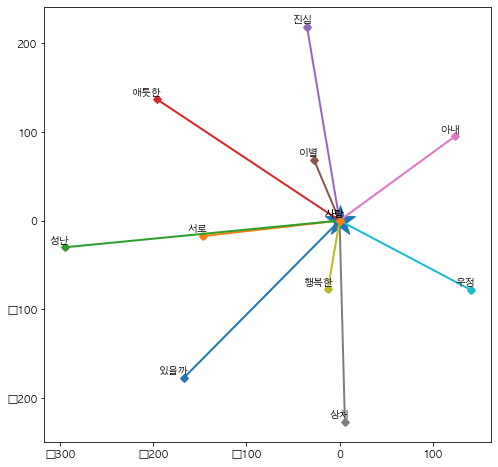

In [32]:
df_xy.loc[df_xy.shape[0]] = (key_word, 0, 0) # 키워드 이름만 가진 emptry row를 새 row로 추가

plt.figure(figsize=(8,8))
plt.scatter(0,0,s=1000, marker='*')  # 별 그리기

for i in range(len(df_xy.x)): # keyword row를 제외한 모든 row에 대하여:
    a = df_xy.loc[[i, 10], :]
    
    plt.plot(a.x, a.y, '-D', linewidth=2) # 선 그려주기
    
    plt.scatter(df_xy.x[i], df_xy.y[i])  # 해당 row 키워드의 x, y좌표 위치 표시
    
    plt.annotate(df_xy.words[i], xytext=(5,2),  
                xy=(df_xy.x[i], df_xy.y[i]),
                textcoords='offset points',
                ha='right', va='bottom')
plt.show()